**1. Write a function with the following signature such that it can handle both call and put options.**

mc_pricing(S, K, T, r, sigma, option_type, no_trial)

• You are required to use the following call and examples to test your function

– An European call with continuous dividend yield: S = 50,K = 80,r = 0.1,T = 5/12, σ = 0.35

– An European put option on stock indexes with a cost-of-carry: S = 80,K = 75, r = 0.1,T = 5/12, σ = 0.20

– The no_trial: should be at least 107

– Plot your simulation results for the ﬁrst 5 trials (You can ’relax’ the huge trial number a little bit for the sake of visualization)

**Extra credits Polish Monte Carlo simulations (10 points)**

In [1]:
from math import sqrt, exp
from scipy import stats

print("Hart’s algorithm to compute cumulative standard normal distribution:\n")

def CaculateStandardNormalCDF(x):
    print("\nThe stats.norm.cdf( ) for this inputs", x, "is:", stats.norm.cdf(x, 0.0, 1.0))

    a1 = 0.0352624965998911
    a2 = 0.700383064443688
    a3 = 6.37396220353165
    a4 = 33.912866078383
    a5 = 112.079291497871
    a6 = 221.213596169931
    a7 = 220.206867912376
    b1 = 0.0883883476483184
    b2 = 1.75566716318264
    b3 = 16.064177579207
    b4 = 86.7807322029461
    b5 = 296.564248779674
    b6 = 637.333633378831
    b7 = 793.826512519948
    b8 = 440.413735824752

    t1 = 7.07106781186547
    t2 = 37
    t3 = 2.506628274631

    N=0


    if(x<0):
        x=-x
        A = ((((((a1*x + a2)*x + a3)*x + a4)*x + a5)*x + a6)*x + a7)
        B = (((((((b1*x + b2)*x + b3)*x + b4)*x + b5)*x + b6)*x + b7)*x + b8)
        C = x + 1 / (x + 2 / (x + 3 / (x + 4 / (x + 0.65))))

        if(x<t1):
           N=exp((x**2)*((-1)/2))*(A/B)

        if(x<=t2 and x>=t1):
           N=exp((x**2)*((-1)/2))*(1/(t3*C))

        elif(x>t2):
           N=0
        print("\nThe Standard Normal CDF of this input", -x, "is:", N)

    if(x>0):
        A = ((((((a1 * x + a2) * x + a3) * x + a4) * x + a5) * x + a6) * x + a7)
        B = (((((((b1 * x + b2) * x + b3) * x + b4) * x + b5) * x + b6) * x + b7) * x + b8)
        C = x + 1 / (x + 2 / (x + 3 / (x + 4 / (x + 0.65))))

        if (x < t1):
            N = 1-(exp((x ** 2) * ((-1) / 2)) * (A / B))

        if (x <= t2 and x >= t1):
            N = 1-(exp((x ** 2) * ((-1) / 2)) * (1 / (t3 * C)))

        elif (x > t2):
            N = 1

        print("\nThe Standard Normal CDF of this input",x, "is:", N)



CaculateStandardNormalCDF(-0.02)
CaculateStandardNormalCDF(0.02)
CaculateStandardNormalCDF(0.8)
CaculateStandardNormalCDF(0.182)



Hart’s algorithm to compute cumulative standard normal distribution:


The stats.norm.cdf( ) for this inputs -0.02 is: 0.492021686283098

The Standard Normal CDF of this input -0.02 is: 0.492021686283098

The Standard Normal CDF of this input 0.02 is: 0.507978313716902

The stats.norm.cdf( ) for this inputs 0.02 is: 0.5079783137169019

The Standard Normal CDF of this input 0.02 is: 0.507978313716902

The stats.norm.cdf( ) for this inputs 0.8 is: 0.7881446014166034

The Standard Normal CDF of this input 0.8 is: 0.7881446014166034

The stats.norm.cdf( ) for this inputs 0.182 is: 0.5722086370495298

The Standard Normal CDF of this input 0.182 is: 0.5722086370495298


In [2]:
from scipy import stats
from math import exp,log,sqrt

def bsm_prcing(S,K,T,r,sigma,q,option_type):

    if (option_type == 'put'):

        b=r-q

        d1 = (log(S / K) + (b + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
        d2 = d1 - sigma * sqrt(T)

        N_n_d2 = stats.norm.cdf(-d2, 0.0, 1.0)
        N_n_d1 = stats.norm.cdf(-d1, 0.0, 1.0)

        put_price = K * exp(-r * T) * N_n_d2 - S *exp(-(b-r)*T)* N_n_d1

        print ("The European",option_type,"price using BSM Model is", put_price)


    if(option_type=='call'):

        d1= (log(S / K) + (r-q+ 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
        d2=d1-sigma*sqrt(T)

        N_n_d2 = stats.norm.cdf(d2, 0.0, 1.0)
        N_n_d1 = stats.norm.cdf(d1, 0.0, 1.0)

        call_price=S * exp( -q * T) * N_n_d1- K * exp(-r * T) * N_n_d2

        print ("The European", option_type, "price using BSM Model is", call_price)

bsm_prcing(50.0,80.0,0.4167,0.1,0.35,0.05,'call')
bsm_prcing(80.0,75.0,0.4167,0.1,0.20,0.07,'put')

The European call price using BSM Model is 0.1208018210077284
The European put price using BSM Model is 0.44834326461199225


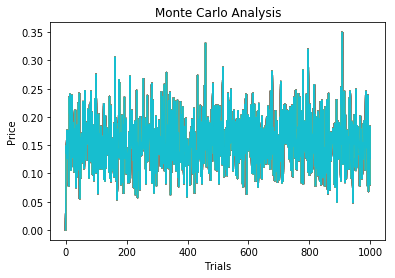

In [4]:
from math import exp, sqrt
from numpy import *
from pylab import plot, show
import numpy as np
import matplotlib.pyplot as plt


def mc_pricing(S, K, T, R, sigma, option_type, no_trial):
    price = np.zeros(no_trial)

    random.seed(1000)
    
    for x in range(1,no_trial):
        
        z = random.standard_normal(no_trial)
        
        if (option_type == 'call'):
           
            ST = S * exp((R - 0.5 * sigma ** 2) * T + sigma * sqrt(T) * z)

            payOff = maximum(ST - K, 0)

            price[x] = np.exp(-R * T) * np.sum(payOff) / no_trial
            
            
            #print ("The European", option_type, "price is", price)



        if (option_type == 'put'):
            ST = S * exp((R - 0.5 * sigma ** 2) * T + sigma * sqrt(T) * z)

            payOff = maximum(K - ST, 0)

            price[x]= np.exp(-R * T) * np.sum(payOff) / no_trial
            
    return price



for run in range(50):
    plt.plot(mc_pricing(50.0,80.0,0.4167,0.1,0.35,'call',10**3))    
    
    
plt.xlabel("Trials")
plt.ylabel("Price")  
plt.title("Monte Carlo Analysis")
plt.show()


**2. Python multithreading programming for Monte Carlo simulations**

• Multithreading programming is an important skill in data analytics.

• Go through the following sample multithreading python demo codes to understand multithreading programming basics.

• Convert your Monte Carlo simulation results in to a multithreading version

In [ ]:
import threading
import time
import warnings

warnings.filterwarnings('ignore')


start_time = time.clock()
no_thread = 10000
for i in range(no_thread):
        t = threading.Thread(target = mc_pricing(50.0,80.0,0.4167,0.1,0.35,'call',10**3), args = (i,))
        t.start()
        print("\n-->  "+t.getName() + "\n")
        #time.sleep(1)

print("\n The main stread stops after {}".format(time.clock()-start_time) + " seconds")


**Reference**


https://blog.csdn.net/u014281392/article/details/76202493 蒙特卡洛估值计算(欧式期权）